# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from ratelimit import limits
from scipy.stats import linregress
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
#Set up URL

url = "http://api.openweathermap.org/data/2.5/weather?"

#Create dictionary to store data from API calls (example call shown at https://openweathermap.org/current#current_JSON)
weather_dict= {"City": [],"Country": [], "Latitude": [],
               "Longitude": [],"Max Temperature": [], "Cloudiness": [],
               "Wind Speed": [],"Humidity": [],"Date": []}
            
#Create variables to assist in limiting call numbers
call_num = 1
set_num = 1

#Randomly select 500 cities from the list:
rand_cities = random.choices(cities, k=560)


#For loop to iterate through cities and make API calls

for i, city in enumerate(rand_cities):
    query_url = url+"appid="+weather_api_key+"&units=imperial"+"&q="+cities[i]
    city = requests.get(query_url).json()
    
#Try statement to store complete data into dictionary
    try:
        weather_dict["City"].append(city["name"])
        weather_dict["Country"].append(city["sys"]["country"])
        weather_dict["Latitude"].append(city["coord"]["lat"])
        weather_dict['Longitude'].append(city['coord']['lon'])
        weather_dict['Max Temperature'].append(city["main"]["temp_max"])
        weather_dict['Cloudiness'].append(city["clouds"]["all"])
        weather_dict['Wind Speed'].append(city['wind']['speed'])
        weather_dict['Humidity'].append(city['main']['humidity'])
        weather_dict['Date'].append(city['dt'])
        city_name=city["name"]
        
        #Print statement with city number and city name for each city     
        print(f"Retrieving data for city {call_num} in set {set_num}. City: {city_name}")            
     
       #iterate on call and set counters
        if call_num == 50:
            call_num = 1
            set_num += 1
            time.sleep(60)
        else:
            call_num +=1
    
    except: 
        print("Missing data for this city, skipping to next")
        pass
    
print("Data collection complete!")


Retrieving data for city 1 in set 1. City: Ribeira Grande
Retrieving data for city 2 in set 1. City: Ulaangom
Retrieving data for city 3 in set 1. City: Saskylakh
Retrieving data for city 4 in set 1. City: Jamestown
Retrieving data for city 5 in set 1. City: Saint George
Retrieving data for city 6 in set 1. City: Castro
Retrieving data for city 7 in set 1. City: Vao
Retrieving data for city 8 in set 1. City: Mongoumba
Retrieving data for city 9 in set 1. City: Hermanus
Retrieving data for city 10 in set 1. City: Evensk
Retrieving data for city 11 in set 1. City: Ushuaia
Retrieving data for city 12 in set 1. City: Palmer
Retrieving data for city 13 in set 1. City: Bethel
Missing data for this city, skipping to next
Retrieving data for city 14 in set 1. City: Punta Arenas
Retrieving data for city 15 in set 1. City: Hilo
Retrieving data for city 16 in set 1. City: Boguchany
Retrieving data for city 17 in set 1. City: Sarangani
Retrieving data for city 18 in set 1. City: Mataura
Retrieving

Retrieving data for city 43 in set 3. City: Adrar
Retrieving data for city 44 in set 3. City: Tasiilaq
Retrieving data for city 45 in set 3. City: Malindi
Retrieving data for city 46 in set 3. City: Pescia
Retrieving data for city 47 in set 3. City: Pankovka
Missing data for this city, skipping to next
Missing data for this city, skipping to next
Retrieving data for city 48 in set 3. City: Vostok
Retrieving data for city 49 in set 3. City: Panacan
Retrieving data for city 50 in set 3. City: Provideniya
Missing data for this city, skipping to next
Retrieving data for city 1 in set 4. City: Chute-aux-Outardes
Retrieving data for city 2 in set 4. City: Fukuechō
Retrieving data for city 3 in set 4. City: Rāvar
Retrieving data for city 4 in set 4. City: Touros
Retrieving data for city 5 in set 4. City: Bud
Retrieving data for city 6 in set 4. City: Port Alfred
Retrieving data for city 7 in set 4. City: Nishihara
Retrieving data for city 8 in set 4. City: Taunsa
Retrieving data for city 9 in

Retrieving data for city 36 in set 6. City: Barcelos
Retrieving data for city 37 in set 6. City: Bengkulu
Missing data for this city, skipping to next
Retrieving data for city 38 in set 6. City: Acapulco de Juárez
Retrieving data for city 39 in set 6. City: Iquique
Retrieving data for city 40 in set 6. City: Maniitsoq
Retrieving data for city 41 in set 6. City: Charters Towers
Retrieving data for city 42 in set 6. City: Béboto
Retrieving data for city 43 in set 6. City: Kyzyl-Suu
Retrieving data for city 44 in set 6. City: Yeppoon
Retrieving data for city 45 in set 6. City: Pandan
Retrieving data for city 46 in set 6. City: Otane
Retrieving data for city 47 in set 6. City: Monrovia
Retrieving data for city 48 in set 6. City: Tautira
Retrieving data for city 49 in set 6. City: Qaqortoq
Retrieving data for city 50 in set 6. City: Vytegra
Retrieving data for city 1 in set 7. City: Chegdomyn
Retrieving data for city 2 in set 7. City: Kamaishi
Retrieving data for city 3 in set 7. City: Port

Retrieving data for city 37 in set 9. City: Deputatsky
Retrieving data for city 38 in set 9. City: Urmia
Retrieving data for city 39 in set 9. City: Am Timan
Retrieving data for city 40 in set 9. City: Puerto Baquerizo Moreno
Retrieving data for city 41 in set 9. City: Bubaque
Retrieving data for city 42 in set 9. City: Sharjah city
Retrieving data for city 43 in set 9. City: Erzin
Retrieving data for city 44 in set 9. City: Tsimmerbude
Retrieving data for city 45 in set 9. City: Salāya
Retrieving data for city 46 in set 9. City: Gimli
Retrieving data for city 47 in set 9. City: Chino Valley
Retrieving data for city 48 in set 9. City: Half Moon Bay
Retrieving data for city 49 in set 9. City: Kieta
Retrieving data for city 50 in set 9. City: Lolodorf
Retrieving data for city 1 in set 10. City: Coyhaique
Retrieving data for city 2 in set 10. City: Luena
Retrieving data for city 3 in set 10. City: Madawaska
Retrieving data for city 4 in set 10. City: Mnogovershinnyy
Retrieving data for ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df=pd.DataFrame(weather_dict)

weather_df.to_csv(output_data_file)
weather_df


,City,Country,Latitude,Longitude,Max Temperature,Cloudiness,Wind Speed,Humidity,Date
0,Ribeira Grande,PT,38.5167,-28.7000,61.20,40,16.11,82,1643993085
1,Ulaangom,MN,49.9811,92.0667,-21.33,80,3.13,93,1643993085
2,Saskylakh,RU,71.9167,114.0833,-7.92,100,4.25,99,1643993039
3,Jamestown,US,42.0970,-79.2353,21.09,100,5.01,62,1643993085
4,Saint George,US,37.1041,-113.5841,41.47,0,1.01,44,1643992861
...,...,...,...,...,...,...,...,...,...
517,Uíge,AO,-7.6087,15.0613,71.42,96,2.73,87,1643993829
518,Anáhuac,MX,27.2333,-100.1500,34.54,100,22.01,38,1643993829
519,Darovskoy,RU,58.7700,47.9564,14.29,100,7.09,94,1643993829
520,Coahuayana Viejo,MX,18.7333,-103.6833,81.88,4,3.44,30,1643993830


In [6]:
#Determine if humidity outliers need to be removed

try:
    weather_df.loc(weather_df[weather_df['Humidity']]<=100)
except:
    print("No rows with Humidity over 100")

No rows with Humidity over 100


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Create summary chart
weather_df.describe()

,Latitude,Longitude,Max Temperature,Cloudiness,Wind Speed,Humidity,Date
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02
mean,19.985581,17.303060,49.562739,60.856322,8.873774,72.210728,1.643993e+09
std,33.347175,90.977310,33.558038,39.363024,6.790358,21.954359,2.373595e+02
min,-54.800000,-175.200000,-36.040000,0.000000,0.000000,6.000000,1.643993e+09
25%,-7.165875,-65.125550,25.470000,20.000000,3.907500,62.000000,1.643993e+09
50%,24.219100,20.513700,61.045000,75.000000,7.100000,76.500000,1.643993e+09
75%,48.669325,95.091675,78.095000,100.000000,11.605000,89.000000,1.643994e+09
max,78.218600,179.316700,97.560000,100.000000,45.900000,100.000000,1.643994e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This shows a possible negative, curvilinear relationship between Latitude and Temperature


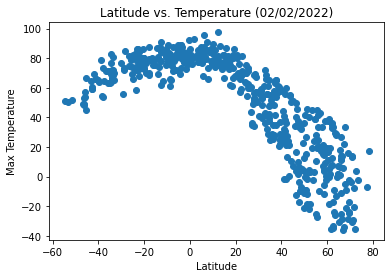

In [8]:
plt.scatter(weather_df['Latitude'], weather_df['Max Temperature'])
plt.title("Latitude vs. Temperature (02/02/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig('output_data/scatter1')
print('This shows a possible negative, curvilinear relationship between Latitude and Temperature')

## Latitude vs. Humidity Plot

This plot shows how Latitude might affect Humidity. At first glance, there doesn't appear to be a relationship


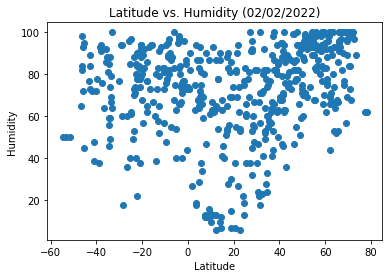

In [9]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'])
plt.title("Latitude vs. Humidity (02/02/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('output_data/scatter2')
print("This plot shows how Latitude might affect Humidity. At first glance, there doesn't appear to be a relationship")

## Latitude vs. Cloudiness Plot

This plot shows how Latitude might affect Cloudiness. At first glance, there doesn't appear to be a relationship


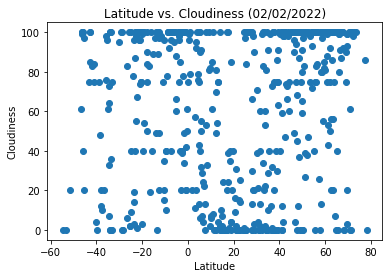

In [10]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'])
plt.title("Latitude vs. Cloudiness (02/02/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('output_data/scatter3')
print("This plot shows how Latitude might affect Cloudiness. At first glance, there doesn't appear to be a relationship")

## Latitude vs. Wind Speed Plot

This shows a possible positive, linear relationship between Latitude and Windspeed


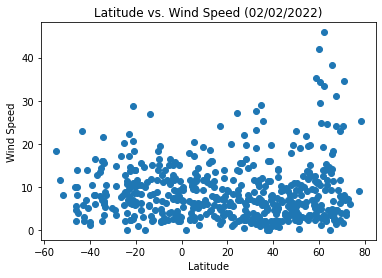

In [11]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'])
plt.title("Latitude vs. Wind Speed (02/02/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('output_data/scatter4')
print('This shows a possible positive, linear relationship between Latitude and Windspeed')

## Linear Regression

In [12]:
#Create new dataframes for both hemispheres

north_df = weather_df.loc[weather_df['Latitude']>=0]
south_df = weather_df.loc[weather_df['Latitude']<=0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the p value is 1.545461914323427e-113 and the r value is -0.873849597963916


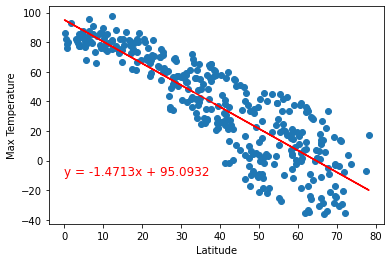

In [14]:
#Generate Regression and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'], north_df['Max Temperature'])
regress_values = north_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(north_df['Latitude'],north_df['Max Temperature'])
plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(0,-10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig('output_data/reg1')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the p value is 9.334865768826723e-25 and the r value is 0.6926000956790135


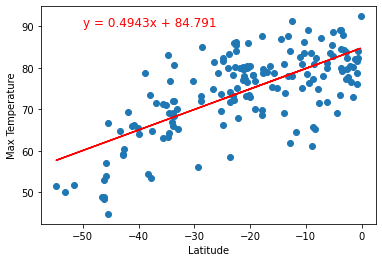

In [16]:
#Generate Regression and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'], south_df['Max Temperature'])
regress_values = south_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(south_df['Latitude'],south_df['Max Temperature'])
plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(-50,90),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig('output_data/reg2')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the p value is 8.499347923608178e-22 and the r value is 0.4775910531150967


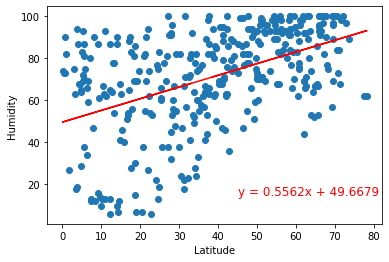

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'], north_df['Humidity'])
regress_values = north_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(north_df['Latitude'],north_df['Humidity'])
plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(45,15),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('output_data/reg3')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the p value is 0.14479495799588707 and the r value is 0.11436440885099322


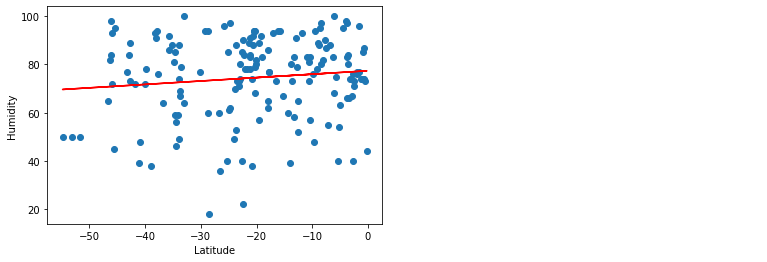

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'], south_df['Humidity'])
regress_values = south_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(south_df['Latitude'],south_df['Humidity'])
plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(45,15),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('output_data/reg4')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the p value is 3.009181484562841e-11 and the r value is 0.3418177715768473


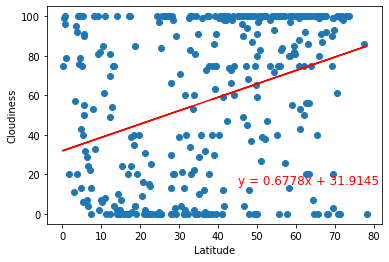

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'], north_df['Cloudiness'])
regress_values = north_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(north_df['Latitude'],north_df['Cloudiness'])
plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(45,15),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('output_data/reg5')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the p value is 0.011976591071997222 and the r value is 0.1958136959310225


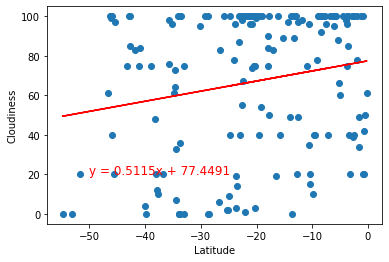

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'], south_df['Cloudiness'])
regress_values = south_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(south_df['Latitude'],south_df['Cloudiness'])
plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(-50,20),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('output_data/reg6')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the p value is 0.02250092142788959 and the r value is 0.12057845309891588


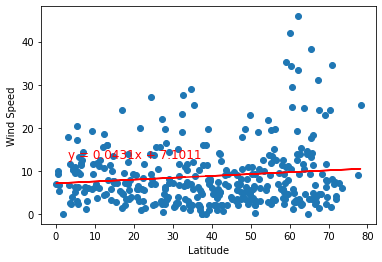

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'], north_df['Wind Speed'])
regress_values = north_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(north_df['Latitude'],north_df['Wind Speed'])
plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(3,13),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('output_data/reg7')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the p value is 0.643284243569915 and the r value is -0.036429590075220106


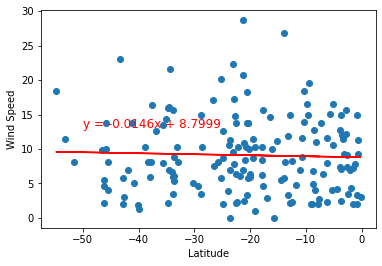

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'], south_df['Wind Speed'])
regress_values = south_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(south_df['Latitude'],south_df['Wind Speed'])
plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(-50,13),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('output_data/reg8')
print(f'the p value is {pvalue} and the r value is {rvalue}')